# Introduction

# Part I
# Data Cleaning

We import a csv file with 397 cars with (cylinders, displacement, horsepower, weight, 
acceleration, year, origin, and name as features) and want to classify the mpg into above 
and below the median as our end prediction. Firstly, we read in the csv file. We proceed by calculating the median mpg and create a new column where we seperate the below and above median mpg. Afterwards, we remove the rows with non numerical data (they represent roughly 1% of the dataset so that will have minimal impact on our predictions) and convert the string formatted columns to float/integer format. After this, we preprocess the data using the MinMax Scaler in order for all the variables to be on the same scale (0 to 1). Additionally, we investigate to see if breaking the name feature into dummy variables and conduct Principal
Component Analysis (PCA) to see if a small number of principal components can explain most of the variance in the data (it does not, as was generally expected).

In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

%matplotlib inline

In [75]:
# import csv file and look at the first 10 rows

Cars_mileage = pd.read_csv('Cars_mileage.csv')
Cars_mileage.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


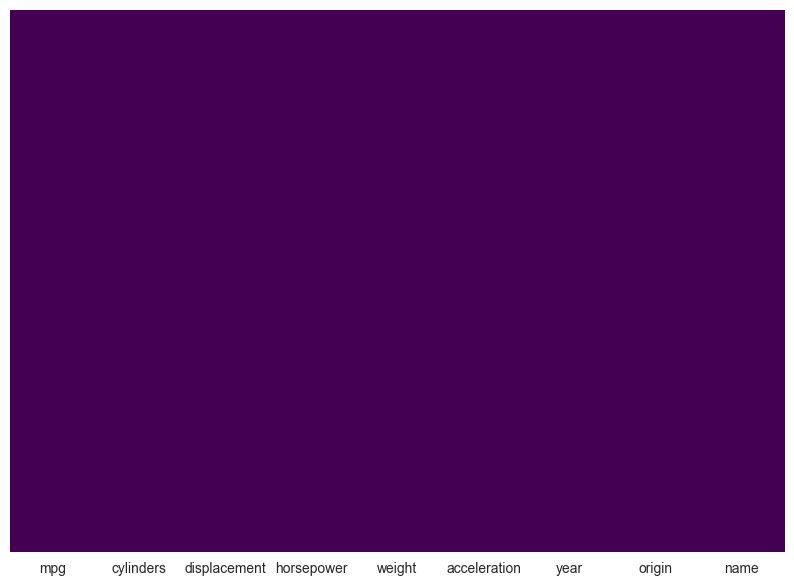

In [76]:
# This heatmap checks to see if there are any null values in the dataset. It appears there are
# none.

plt.figure(figsize=(10,7))
sns.heatmap(Cars_mileage.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [77]:
# Calculate median mpg

Cars_mileage['mpg'].median()

23.0

In [78]:
# Create a new variable called mpg_binary

Cars_mileage['mpg_binary'] = Cars_mileage.apply(lambda _: '', axis=1)

In [79]:
# Check your new dataframe

Cars_mileage.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg_binary
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500,
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala,
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii,
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina,
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl,


In [80]:
# Set column mpg_binary to be 1 when the mpg is greater then median (23) and 0 otherwise

Cars_mileage['mpg_binary'] = np.where(Cars_mileage['mpg']> 23, '1', '0')    

In [81]:
# Create a new variable for the purpose of being able to come to this dataframe as is
# to its previously saved form 

y = Cars_mileage

In [82]:
y

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg_binary
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500,0
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala,0
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii,0
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina,0
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl,0


In [83]:
Cars_mileage['name'].head(5)

0    chevrolet chevelle malibu
1            buick skylark 320
2           plymouth satellite
3                amc rebel sst
4                  ford torino
Name: name, dtype: object

In [85]:
# Check for column types to see what needs to be converted to int/float

Cars_mileage.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
mpg_binary       object
dtype: object

In [86]:
# We can see there is a "?" string in horsepower that we will need to resolve before further
# processing this dataset

Cars_mileage['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148', '129',
       '96', '71', '98', '115', '53', '81', '79', '120', '152', '102',
       '108', '68', '58', '149', '89', '63', '48', '66', '139', '103',
       '125', '133', '138', '135', '142', '77', '62', '132', '84', '64',
       '74', '116', '82'], dtype=object)

In [87]:
# Drop all rows that have a '?' instead of numerical value in the horsepower column, has
# less than 1% impact on predictive power later in the model therefore, completely fine
# to do this in this particular dataset to still get good predictive model.

df = Cars_mileage[Cars_mileage.horsepower != '?']
df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg_binary
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500,0
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala,0
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii,0
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina,0
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl,0


In [88]:
# convert string column to float

df.horsepower  = [float(x) if (type(x) == str) else x for x in df['horsepower']]

In [90]:
# convert string column to float

df.mpg_binary  = [float(x) if (type(x) == str) else x for x in df['mpg_binary']]

In [91]:
# Check that all columns are converted to float or int data type

df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
mpg_binary      float64
dtype: object

In [92]:
del df['name']

In [93]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
year              int64
origin            int64
mpg_binary      float64
dtype: object

In [94]:
# Normalize the data (for all variables to be on a scale from 0 to 1)

from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler().fit_transform(df.astype(float))
MinMax = pd.DataFrame(Scaler, columns = df.columns)

# Min Max Scaler

MinMax.head(20)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg_binary
0,0.239362,1.0,0.617571,0.456522,0.536150,0.238095,0.0,0.0,0.0
1,0.159574,1.0,0.728682,0.646739,0.589736,0.208333,0.0,0.0,0.0
2,0.239362,1.0,0.645995,0.565217,0.516870,0.178571,0.0,0.0,0.0
3,0.186170,1.0,0.609819,0.565217,0.516019,0.238095,0.0,0.0,0.0
4,0.212766,1.0,0.604651,0.510870,0.520556,0.148810,0.0,0.0,0.0
5,0.159574,1.0,0.932817,0.826087,0.773462,0.119048,0.0,0.0,0.0
6,0.132979,1.0,0.997416,0.945652,0.777148,0.059524,0.0,0.0,0.0
7,0.132979,1.0,0.961240,0.918478,0.765240,0.029762,0.0,0.0,0.0
8,0.132979,1.0,1.000000,0.972826,0.797278,0.119048,0.0,0.0,0.0
9,0.159574,1.0,0.832041,0.782609,0.634250,0.029762,0.0,0.0,0.0


# PCA (Principal Component Analysis)

The purpose of this Principal Component Analysis is to see if the feature "name", which represents the type of car in this dataset can add extra predictive power to the original dataset without it. My conjecture is that in this particular dataset, this unsupervised learning tool will be of little use because most of the datapoints represent original car types (there are 301 unique car types vs 392 datapoints analyzed), so there can be very little value extracted from using this additional feature since every car is different from almost every other car and there is little correlation that can identified between car name and the target variable car mpg. This is especially the case that all the other features are quiet strong and should be more than sufficient to produce a good model. Nevertheless, it is interesting to experiment to see how many principal components will it take to explain most of the variance in this dataset and see if my hypothesis is right or wrong.

In [57]:
# Create dummy variables for all the car types

car_name = pd.get_dummies(df.name)

car_name.columns 
car_name.head()

,amc ambassador brougham,amc ambassador dpl,amc ambassador sst,amc concord,amc concord d/l,amc concord dl 6,amc gremlin,amc hornet,amc hornet sportabout (sw),amc matador,...,volvo 145e (sw),volvo 244dl,volvo 245,volvo 264gl,volvo diesel,vw dasher (diesel),vw pickup,vw rabbit,vw rabbit c (diesel),vw rabbit custom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
# Concatenate the original dataset with the newly created dummy variables for all car types

Concatenated = pd.concat([df, car_name], axis = 1)

Concatenated.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg_binary,...,volvo 145e (sw),volvo 244dl,volvo 245,volvo 264gl,volvo diesel,vw dasher (diesel),vw pickup,vw rabbit,vw rabbit c (diesel),vw rabbit custom
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,0.0,...,0,0,0,0,0,0,0,0,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,0.0,...,0,0,0,0,0,0,0,0,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,0.0,...,0,0,0,0,0,0,0,0,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,0.0,...,0,0,0,0,0,0,0,0,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,0.0,...,0,0,0,0,0,0,0,0,0,0
5,15.0,8,429.0,198.0,4341,10.0,70,1,ford galaxie 500,0.0,...,0,0,0,0,0,0,0,0,0,0
6,14.0,8,454.0,220.0,4354,9.0,70,1,chevrolet impala,0.0,...,0,0,0,0,0,0,0,0,0,0
7,14.0,8,440.0,215.0,4312,8.5,70,1,plymouth fury iii,0.0,...,0,0,0,0,0,0,0,0,0,0
8,14.0,8,455.0,225.0,4425,10.0,70,1,pontiac catalina,0.0,...,0,0,0,0,0,0,0,0,0,0
9,15.0,8,390.0,190.0,3850,8.5,70,1,amc ambassador dpl,0.0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
# Deleting variable from which dummy variables were created.

del Concatenated['name']

In [61]:
# To see if there are any non int/float variables (there are not)

Concatenated.dtypes

mpg                                float64
cylinders                            int64
displacement                       float64
horsepower                         float64
weight                               int64
acceleration                       float64
year                                 int64
origin                               int64
name                                object
mpg_binary                         float64
amc ambassador brougham              uint8
amc ambassador dpl                   uint8
amc ambassador sst                   uint8
amc concord                          uint8
amc concord d/l                      uint8
amc concord dl 6                     uint8
amc gremlin                          uint8
amc hornet                           uint8
amc hornet sportabout (sw)           uint8
amc matador                          uint8
amc matador (sw)                     uint8
amc pacer                            uint8
amc pacer d/l                        uint8
amc rebel s

In [63]:
# Normalize the data (for all variables to be on a scale from 0 to 1)

from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler().fit_transform(Concatenated.astype(float))
MinMax = pd.DataFrame(Scaler, columns = Concatenated.columns)

# Min Max Scaler

MinMax.head(20)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg_binary,amc ambassador brougham,...,volvo 145e (sw),volvo 244dl,volvo 245,volvo 264gl,volvo diesel,vw dasher (diesel),vw pickup,vw rabbit,vw rabbit c (diesel),vw rabbit custom
0,0.239362,1.0,0.617571,0.456522,0.536150,0.238095,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.159574,1.0,0.728682,0.646739,0.589736,0.208333,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.239362,1.0,0.645995,0.565217,0.516870,0.178571,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.186170,1.0,0.609819,0.565217,0.516019,0.238095,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.212766,1.0,0.604651,0.510870,0.520556,0.148810,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.159574,1.0,0.932817,0.826087,0.773462,0.119048,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.132979,1.0,0.997416,0.945652,0.777148,0.059524,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.132979,1.0,0.961240,0.918478,0.765240,0.029762,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.132979,1.0,1.000000,0.972826,0.797278,0.119048,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.159574,1.0,0.832041,0.782609,0.634250,0.029762,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
# Import PCA from scikit-learn

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale


In [65]:
# 310 features

pca = PCA(n_components=310)

In [66]:
# Fit the model

pca.fit(MinMax)

PCA(copy=True, iterated_power='auto', n_components=310, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [67]:
#The amount of variance that each PC explains
var= pca.explained_variance_ratio_

In [68]:
#Cumulative Variance explained
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

In [69]:
print var1

[  31.73   37.66   41.67   45.18   46.36   47.18   47.86   48.53   49.18
   49.74   50.29   50.83   51.37   51.9    52.4    52.88   53.34   53.76
   54.17   54.58   54.99   55.4    55.81   56.22   56.62   57.01   57.39
   57.76   58.1    58.42   58.71   58.98   59.25   59.52   59.79   60.06
   60.33   60.6    60.87   61.14   61.41   61.68   61.95   62.22   62.49
   62.76   63.03   63.3    63.57   63.84   64.11   64.38   64.65   64.92
   65.19   65.45   65.71   65.97   66.22   66.47   66.72   66.96   67.18
   67.4    67.6    67.74   67.88   68.02   68.16   68.3    68.44   68.58
   68.72   68.86   69.     69.14   69.28   69.42   69.56   69.7    69.84
   69.98   70.12   70.26   70.4    70.54   70.68   70.82   70.96   71.1
   71.24   71.38   71.52   71.66   71.8    71.94   72.08   72.22   72.36
   72.5    72.64   72.78   72.92   73.06   73.2    73.34   73.48   73.62
   73.76   73.9    74.04   74.18   74.32   74.46   74.6    74.74   74.88
   75.02   75.16   75.3    75.44   75.58   75.72   7

From the plot below, our hypothesis has been confirmed. Originally, the graph starts a steep
acceleration in its explanatory power and gets to 50% of the variance very quickly. However, PCA is useful only if it can explain the majority of the variance in the data. As can be seen from the graph below, to explain 80% of the variance would take approximately 150 features, which is rather undesirable as it will most likely decrease the predictive power of the machine learning model used to correctly classify mileage as below or above average mpg. Hence, in the model building stage below, the dataset used is the one normalized before conducting this PCA analysis.

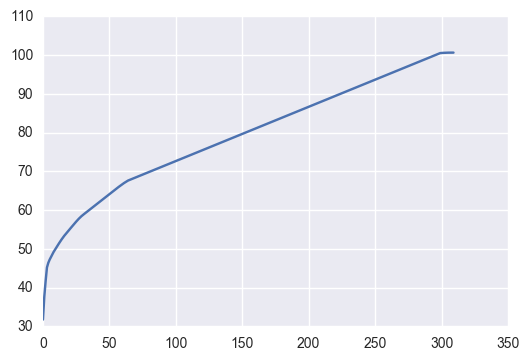

In [70]:
plt.plot(var1)

In [41]:
# A value count of both classification variables is done to assess the baseline prediction.
# Here, if we guess that that all cars have below median_mpg (though that's not possible!)
# our accuracy would be 52%. This is what the predictive models should be compared to

MinMax['mpg_binary'].value_counts()

0.0    205
1.0    187
Name: mpg_binary, dtype: int64

# Part II
# Exploratory Data Analysis (Visualization)

In the section below, we examine the features of the dataset to try to identify patterns to see how each of the variables (features) correlates to the variable we are classifying (below
and above average mpg). We do this by visualizations that include a heatmap and various scatterplots.

In [221]:
# Set the below median mpg to 0 and the above median mpg to 1

Below_median_mpg = np.where(MinMax['mpg_binary'] == 0)[0]
Above_median_mpg = np.where(MinMax['mpg_binary'] == 1)[0]


From the heatmap below we can see that all the features have at least a moderate correlation
to the mpg, in some cases positive in some cases negative, however the negatively correlated
features are much stronger. Cylinders, displacement, horsepower and weight are all very strongly negatively correlated with the mpg_binary target which means that the higher those features, the lower the mpg on a car. Conversely, acceleration, year and origin are all positively correlated with the mpg_binary target which means as they increase, so does the mpg. However, these relationships are not as strong so the variables that most significantly impact mpg_binary target are the negatively correlated weight, displacement, horsepower and number of cylinders.

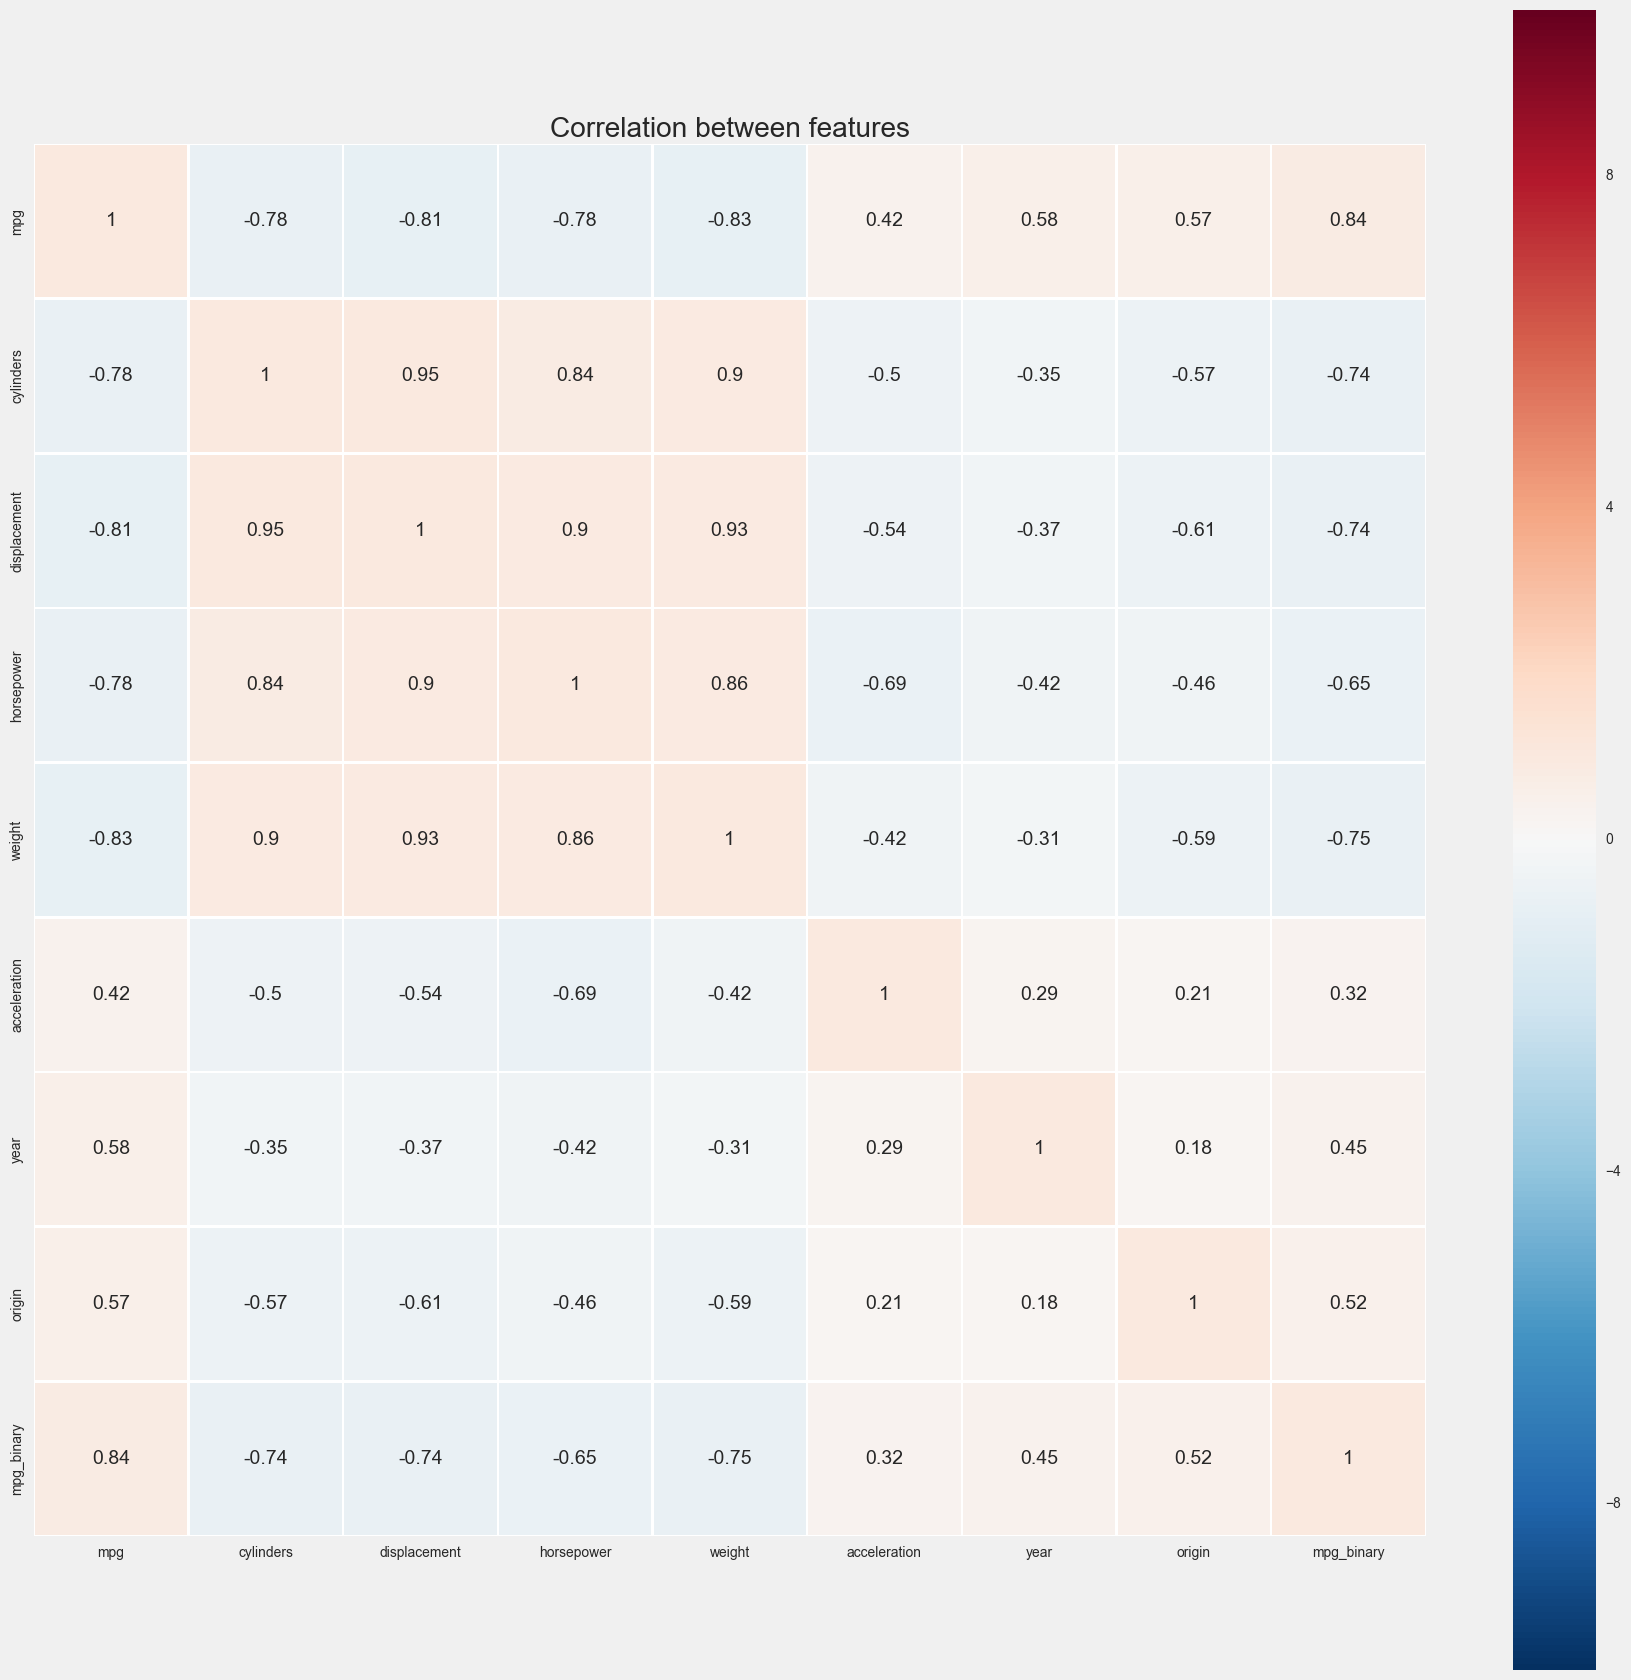

In [299]:
correlation = MinMax.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation, vmax=10, square=True,annot=True,cmap=None, linewidths=1)

plt.title('Correlation between features')

From the scatterplot below you can see that intermediate & high cylinder values correspond to below median miles on average (as can be seen by the predominantly green points) and above average for the low cylinder values. The displacement axis shows a similar relationship to mpg as does the cylinder (intermediate & high displacement values correspond to below median miles on average and above average values mpg for low displacement values).

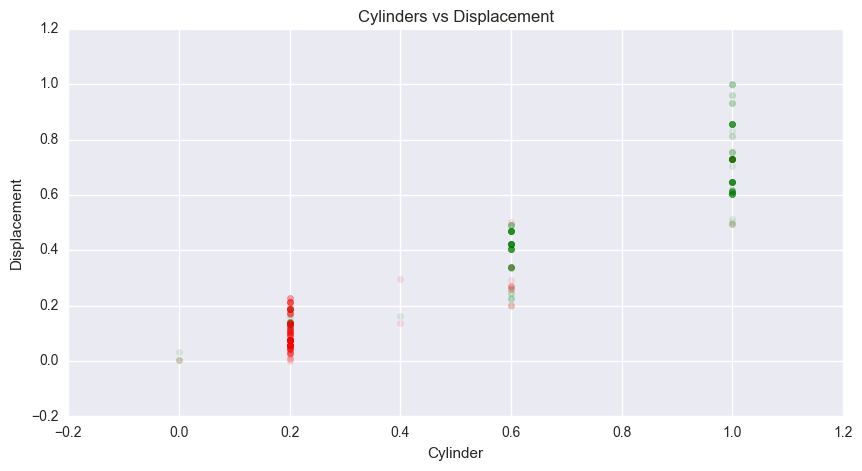

In [223]:
#plot of Cylinders vs Displacement

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(MinMax.cylinders[Below_median_mpg], MinMax.displacement[Below_median_mpg], alpha=0.1, color='g')
ax.scatter(MinMax.cylinders[Above_median_mpg], MinMax.displacement[Above_median_mpg], alpha=0.1, color='r')
ax.set_title("Cylinders vs Displacement")
ax.set_xlabel("Cylinder")
ax.set_ylabel("Displacement")
plt.show()

The graph below shows some very interesting insights! The heavier the car and the larger its 
horsepower, the more likely it is the case that it is a car with below average mileage. The 
opposite is also true, the lighter the car and the lower its horsepower, the more likely it is
the case that the car has above average mileage. It can be seen from the graph that there is 
a somewhat smooth transition between the below and above average mileage at low to intermediate horsepower values and at low to intermediate weight values.

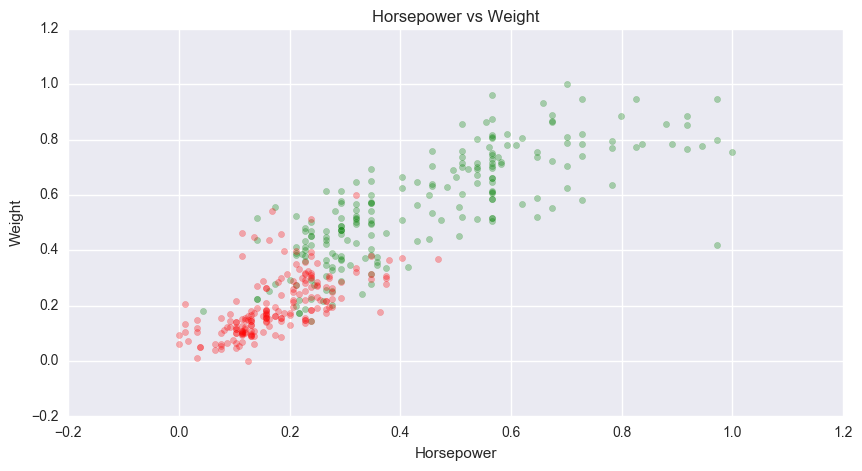

In [228]:
#plot of Cylinders vs Displacement

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(MinMax.horsepower[Below_median_mpg], MinMax.weight[Below_median_mpg], alpha=0.3, color='g')
ax.scatter(MinMax.horsepower[Above_median_mpg], MinMax.weight[Above_median_mpg], alpha=0.3, color='r')
ax.set_title("Horsepower vs Weight")
ax.set_xlabel("Horsepower")
ax.set_ylabel("Weight")
plt.show()

It appears that the relationship between Acceleration vs Year (with below average vs above 
average mpg being the 3rd dimensional variable) is not as distinct as the previous variables.
However, at very low acceleration levels, the mpg is below the median. At medium to high acceleration levels, the mpg has a tendency to be above average. There are also somewhat similar patterns in the Year feature. In years further away from the present, the mpg was on 
the lower side, there was a mix of below and above average mpg in the middle years of the dataset and the mpg was almost entirely above average in the most recent years. That is quiet likely the be a result of improvements in technology over the years (but of course, this would
need additional data analytic work to test such a hypothesis!)

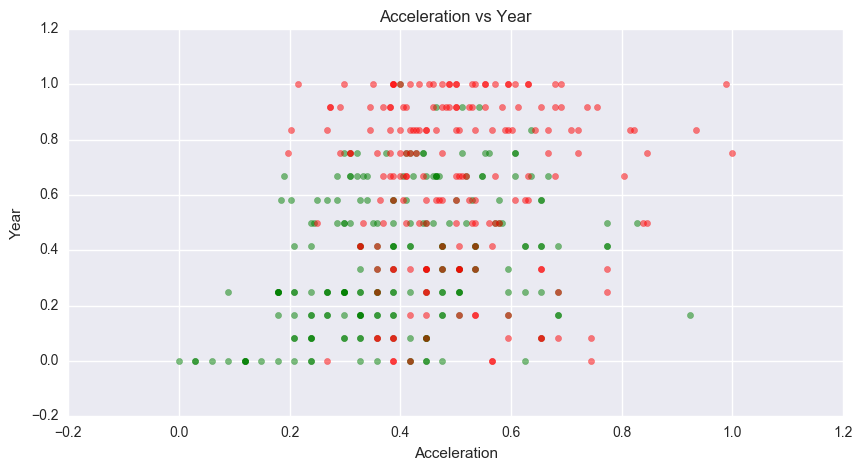

In [230]:
#plot of Acceleration vs Year

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(MinMax.acceleration[Below_median_mpg], MinMax.year[Below_median_mpg], alpha=0.5, color='g')
ax.scatter(MinMax.acceleration[Above_median_mpg], MinMax.year[Above_median_mpg], alpha=0.5, color='r')
ax.set_title("Acceleration vs Year")
ax.set_xlabel("Acceleration")
ax.set_ylabel("Year")
plt.show()

# Part III
# Predictive Modeling

In this section, several Machine Learning will be build. Afterwards, they will be assessed for their cross validation scores as well as various confusion matrix metrics to see how well these models predict and to see how well these models generalize to a dataset they have not
seen before by assessing the strength of the bias-variance tradeoff balance. An (80/20) train/test split has been chosen to get a good sample to train the data on and afterwards test on.

In [304]:
# Setup your features and target variable
X = df[["cylinders", "displacement", "horsepower", "weight", "acceleration", "year", "origin"]]
y = df[["mpg_binary"]]

In [305]:
# train test split
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=0.20, random_state=12345)

# Logistic Regression

In [257]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
model = LogisticRegression()

# fit the model with data
mdl = model.fit(X_train, y_train)

# predict the response for new observations

logit = model.predict(X_test)

# sklearn output to check that ran on right data split.

len(logit)

79

In [258]:
# These represent the y-intercept and coefficients for all the variables in the logistic
# regression.

print(model.intercept_)
print(model.coef_)

[-0.0764292]
[[-0.15616834 -0.00333531 -0.09780543 -0.00267563 -0.45684788  0.32840056
   0.15849536]]


In [259]:
# Prediction Accuracy for Logistic Regression

from sklearn import metrics
print(metrics.accuracy_score(y_test, logit))

0.886075949367


In [260]:
from sklearn.cross_validation import cross_val_score

In [261]:
# This represents the cross validation score for the Logistic Regression

from sklearn.cross_validation import KFold
cv = KFold(X.shape[0], 10, shuffle=True, random_state=33)
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=cv)
print scores.mean()

0.885192307692


In [262]:
#Confusion Matrix

from sklearn import metrics
confusion = metrics.confusion_matrix(y_test, logit)
print ((confusion))

[[38  4]
 [ 5 32]]


In [263]:
y_pred_prob = model.predict_proba(X_test)[:, 1]

The histogram below shows that the model is pretty confident in the cars that it labels
above and below average mpg because most of the counts are concentrated at both extreme
sides. This means that if the model is a good model, it can determine whether a data point
has below or above average mpg pretty easily for the majority of data points.

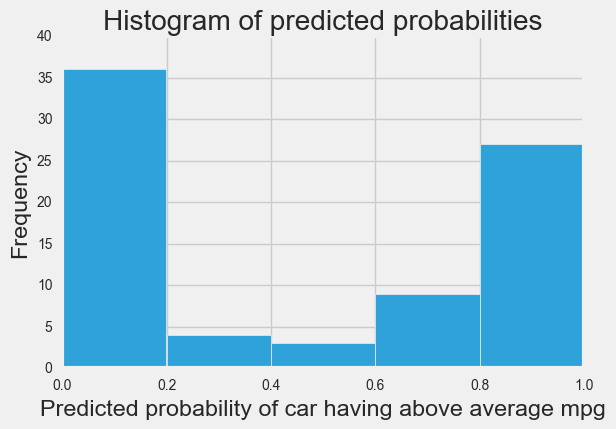

In [264]:
# histogram of predicted probabilities of cars below average and above average mpg
plt.hist(y_pred_prob, bins=5)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of car having above average mpg')
plt.ylabel('Frequency')

The confusion matrix shows that there were only 9 misclassifications out of 79 data points
using the Logistic Regression model. A very good result. The importance of incorrectly classlifying above average mpg as below average vs below age mpg as above average depends on your objective. If you care about not misclassifying above average mpg cars for instance, you would care more about the number of cars incorrectly labeled as below average mpg when they are actually above average mpg and vice versa. In any case, this model does
well with regards to both these measures so this is not a concern that needs to be addressed.

In [265]:
import matplotlib.patheffects as path_effects
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues, \
                          labels = ['Below_median_mpg', 'Above_median_mpg']):
    
    plt.figure(figsize=(5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, fontsize = 12)
    plt.yticks(tick_marks, labels, rotation = 90, fontsize = 12)
        
    plt.title(title, fontsize = 24)
    plt.ylabel('True', fontsize = 18)
    plt.xlabel('Predicted', fontsize = 18)
    plt.tight_layout()
    
    width, height = cm.shape
    
    for x in xrange(width):
        for y in xrange(height):
            plt.annotate(str(cm[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center',
                        color = 'white',
                        fontsize=18).set_path_effects([path_effects.Stroke(linewidth=1, \
                                foreground='black'), path_effects.Normal()])
    return

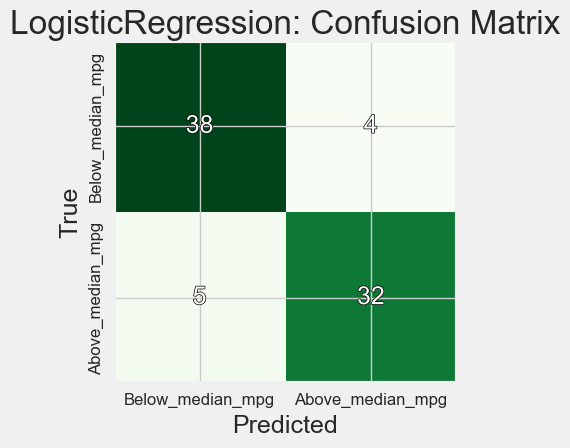

In [266]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, logit)


plot_confusion_matrix(cm, title='LogisticRegression: Confusion Matrix', \
                      labels=['Below_median_mpg', 'Above_median_mpg'], cmap=plt.cm.Greens)


In [267]:
# Classification Accuracy confirmation for Logistic Regression

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, logit))

0.886075949367
0.886075949367


In [268]:
# Misclassification Accuracy confirmation between manual calculation and Logistic Regression
# This is also simply equal to 1-(Classification Accuracy calculated above).

print((FP + FN) / float(TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test, logit))

0.113924050633
0.113924050633


In [269]:
# This Represents the Sensitivity, the % out of True positives that were correctly evaluated.
# This is calculated for Logistic Regression

print(TP / float(TP + FN))
print(metrics.recall_score(y_test, logit))

0.864864864865
0.864864864865


In [270]:
# This represents the Specificity, the % of total True negatives that were correctly identified as negatives.
# This is calculated for Logistic Regression

print(TN / float(TN + FP))

0.904761904762


In [271]:
# This represents the precision, what % of the values that were predicted to be positive
# actually are positive. This is calculated for Logistic Regression

print(TP / float(TP + FP))
print(metrics.precision_score(y_test, logit))

0.888888888889
0.888888888889


The ROC curve below has a good 88%, which shows that the model is pretty good.

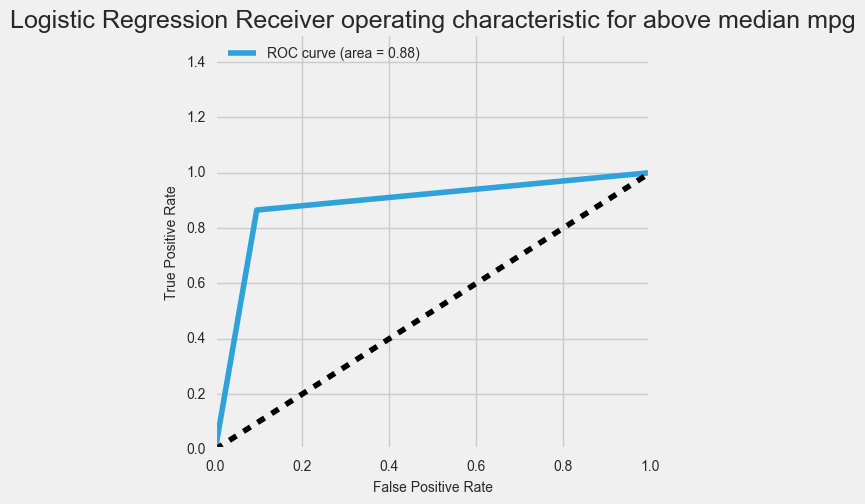

In [290]:
# Roc_curve for Logistic Regression Model


from sklearn.metrics import roc_curve, auc
plt.style.use('fivethirtyeight')

FPR = dict()
TPR = dict()
ROC_AUC = dict()

# For class 1, find the area under the curve
FPR[1], TPR[1], _ = roc_curve(y_test, logit)
ROC_AUC[1] = auc(FPR[1], TPR[1])

# Plot of a ROC curve for class 1 (above_median)
plt.figure(figsize=[5,5])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0, 1])
plt.ylim([0, 1.5])
plt.xlabel('False Positive Rate', fontsize=10)
plt.ylabel('True Positive Rate', fontsize=10)
plt.title('Logistic Regression Receiver operating characteristic for above median mpg', fontsize=18)
plt.legend(loc="upper left")
plt.show()

# Gradient Boosting

In [272]:
from sklearn.ensemble import GradientBoostingClassifier

In [273]:
# Train and predict Gradient Boosting

GradientBoosting = GradientBoostingClassifier()
GradientBoosting.fit(X_train,y_train)
Y_pred=GradientBoosting.predict(X_test)

In [274]:
# Prediction Accuracy for Gradient Boosting

from sklearn import metrics
print(metrics.accuracy_score(y_test, Y_pred))

0.936708860759


In [275]:
from sklearn.cross_validation import cross_val_score

In [276]:
# Cross Validation for Gradient Boosting

from sklearn.cross_validation import KFold
cv = KFold(X.shape[0], 10, shuffle=True, random_state=33)
scores = cross_val_score(GradientBoostingClassifier(), X, y, scoring='accuracy', cv=cv)
print scores.mean()

0.93891025641


The confusion matrix shows that there were only 5 missclassifications out of 79 data points
using the Gradient Boosting model. This result is spectacular and even better than the 
Logistic Regression. The importance of incorrectly classifying above average mpg as below
average vs below aboverage mpg as above average depends on your objective. If you care about
not misclassifying above average mpg cars for instance, you were care more about the number of
cars incorrectly labeled as below average mpg when they are actually above average mpg and
vice versa. In any case, this model does well with regards to both these measures and we do not need to try to identify ways to resolve potential issues.

In [277]:
# Confusion Matrix

from sklearn import metrics
confusion = metrics.confusion_matrix(y_test, Y_pred)
print ((confusion))

[[39  3]
 [ 2 35]]


In [280]:
import matplotlib.patheffects as path_effects
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues, \
                          labels = ['Below_median_mpg', 'Above_median_mpg']):
    
    plt.figure(figsize=(5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, fontsize = 12)
    plt.yticks(tick_marks, labels, rotation = 90, fontsize = 12)
        
    plt.title(title, fontsize = 24)
    plt.ylabel('True', fontsize = 18)
    plt.xlabel('Predicted', fontsize = 18)
    plt.tight_layout()
    
    width, height = cm.shape
    
    for x in xrange(width):
        for y in xrange(height):
            plt.annotate(str(cm[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center',
                        color = 'white',
                        fontsize=18).set_path_effects([path_effects.Stroke(linewidth=1, \
                                foreground='black'), path_effects.Normal()])
    return

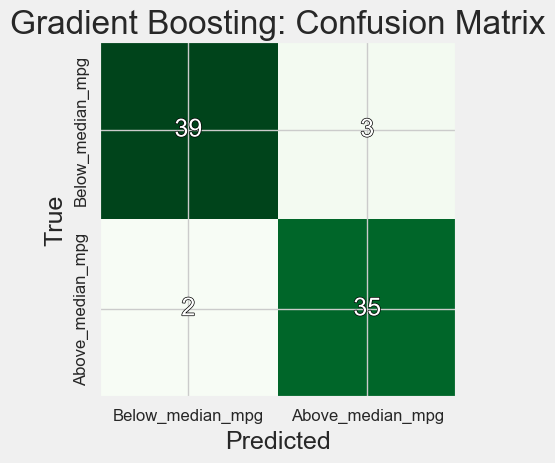

In [282]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, Y_pred)


plot_confusion_matrix(cm, title='Gradient Boosting: Confusion Matrix', \
                      labels=['Below_median_mpg', 'Above_median_mpg'], cmap=plt.cm.Greens)



In [278]:
y_pred_prob = model.predict_proba(X_test)[:, 1]

The histogram below shows that the model is pretty confident in the cars that it labels as
above and below average mpg because most of the counts are concentrated at both extreme
sides. This means that if the model is a good model, it can determine whether a data point
has below or above average mpg pretty easily for the majority of data points.

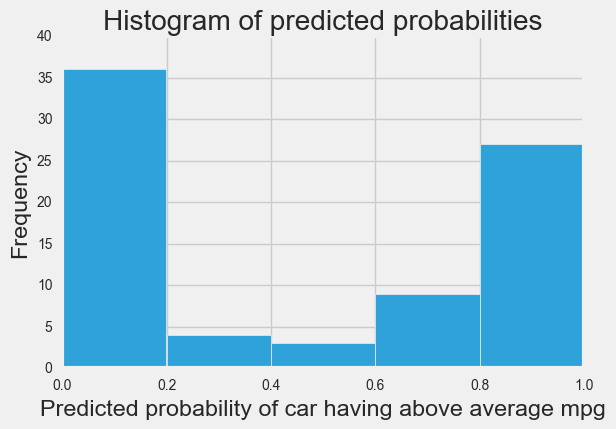

In [279]:
# histogram of predicted probabilities of cars below average and above average mpg
plt.hist(y_pred_prob, bins=5)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of car having above average mpg')
plt.ylabel('Frequency')

In [283]:
# Classification Accuracy confirmation for Gradient Boosting

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, Y_pred))

0.936708860759
0.936708860759


In [284]:
# Misclassification Accuracy confirmation between manual calculation and Gradient Boosting
# This is also simply equal to 1-(Classification Accuracy calculated above).

print((FP + FN) / float(TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test, Y_pred))

0.0632911392405
0.0632911392405


In [285]:
# This Represents the Sensitivity, the % out of True positives that were correctly evaluated 
#as such. This is calculated for Gradient Boosting

print(TP / float(TP + FN))
print(metrics.recall_score(y_test, Y_pred))

0.945945945946
0.945945945946


In [286]:
# This represents the Specificity, the % of total True negatives that were correctly identified as negatives.
# This is calculated for Gradient Boosting


print(TN / float(TN + FP))

0.928571428571


In [287]:
# This represents the precision, what % of the values that were predicted to be positive actually are positive.
# This is calculated for Gradient Boosting

print(TP / float(TP + FP))
print(metrics.precision_score(y_test, Y_pred))

0.921052631579
0.921052631579


As can be seen from the ROC curve below (0.94), this is a very good model for classifying
below and above average mpg

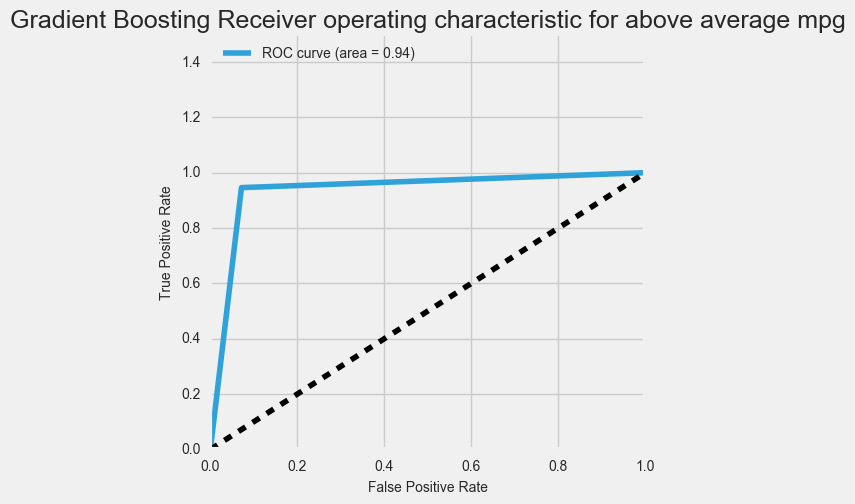

In [291]:
# Roc_curve for Gradient Boosting Model


from sklearn.metrics import roc_curve, auc
plt.style.use('fivethirtyeight')

FPR = dict()
TPR = dict()
ROC_AUC = dict()

# For class 1, find the area under the curve
FPR[1], TPR[1], _ = roc_curve(y_test, Y_pred)
ROC_AUC[1] = auc(FPR[1], TPR[1])

# Plot of a ROC curve for class 1 (above average mpg)
plt.figure(figsize=[5,5])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0, 1])
plt.ylim([0, 1.5])
plt.xlabel('False Positive Rate', fontsize=10)
plt.ylabel('True Positive Rate', fontsize=10)
plt.title('Gradient Boosting Receiver operating characteristic for above average mpg', fontsize=18)
plt.legend(loc="upper left")
plt.show()

# Part IV
# Conclusion

# Assumption

Firstly, it is important to note that there is an assumption made regarding the dataset. 
Fundamentally, we assume that this dataset was randomly sampled from the general population
of cars and is therefore a representative sample. To the extent that this
is not the case can significantly distort our findings. Therefore, whenever possible, we should attempt to determine how the dataset was created to see if the dataset represents an 
entire population or a random sample.




# Insights

The main insights that we can get from conducting this data analysis is that cylinders, displacement, weight and horsepower of a car are strongly negatively correlated to the mpg (values are -.74, -.74, -.75, -.65, respectively on the heatmap correlation graph). This means that the higher the values are for these features, the lower the mpg driven by those vehicles and the lower the values of these features, the higher the mpg driven by those vehicles. The second main observation is that acceleration, year and origin are positively correlated with the mpg of a given vehicle (values are .32, .45, .52 respectively on the heatmap correlation 
graph) and this means that as those variables increase, so does the mpg of the given vehicle 
and vice versa.

So depending upon what the user of this analysis seeks to find, the recommendation would generally be that if you want a car with low mpg (say to perhaps save money on your gas bills at the pump), to buy a car that is low in # of cylinders, weight, horsepower and displacement. 
Another recommendation (of 2nd importance after what was just stated) to this car buyer would be to buy a car on the newer side and that tends to accelerate well.

The Logistic Regression and Gradient Boosting models were chosen because the first is a more 
traditional statistical approach and is somewhat more easily interpretable. Gradient Boosting
was chosen because it is a very flexible model that performs extremely well in most situations
where the data structure between the features and target can actually be learned.

The Gradient Boosting algorithm has given spectacular results, it has a accuracy score of roughly 93.6% compared to the baseline of 52% (if you just guess that every car is below median, not that that's possible). The cross validation scores, needed to see that the model does not overfit and generalizes well to other data is 93.8% which is very good. All other Confusion Matrix metrics (Sensitivity, Specificity, Recall, etc) show results almost the same as the accuracy and cross validation scores. The ROC curve, that compares the false positive and true positive rates and is one of the best indicators of the validity of the model, is 94% which is very good. This tells us that our model is a very good and a reliable source of classification of cars into below and above median values by mpg.